In [1]:
from utils.util import *
from collections import OrderedDict
import os

In [2]:
with open('./utils/utils.json','r') as file:
    utils = json.load(file)
classDict = utils['classes']
classDict

{'horizontal-misalignment': 0,
 'imbalance': 1,
 'normal': 2,
 'overhang': 3,
 'underhang': 4,
 'vertical-misalignment': 5}

# This path should point to either "1sec_random" or "5sec_random" in the G-drive. Tarred data can be found in Machine Learning/Nick/MAFAULDA resources/resources/window

In [3]:
path = './1sec_random/'

In [4]:
dirs = [d for d in os.listdir(path) if not d.startswith('.')]

In [5]:
accs = []
zone_accs = []
for d in dirs:
    try:
        with open(f'{path}{d}/out','r') as file:
            # dictionary representation of out file
            t = json.load(file)
            # sort the dictionary
            for key in sorted(t):
                t[int(key.split('_')[0])] = t.pop(key)
            meta = OrderedDict(sorted(t.items(), key=lambda t: t[0]))
            # pull out the information we need and store in a list
#             accs.append([t[_]['acc'] for _ in t])
            zone_dict = {key: [] for key in classDict}
            acc = []
            for run in meta:
                acc.append(meta[run]['acc'])
                zones = meta[run]['zones']
                zone_classes = [_.split('/')[8] for _ in meta[run]['file_paths']]
                
                for j,zone in enumerate(zone_classes):
                    zone_dict[zone].append(zones[j]['acc'])
#                         print(f'experiment: {i}, {zone}, j, k')
                

            zone_accs.append(zone_dict)
            accs.append(acc)
                
                
                
            
    except Exception as e:
        print(e)
accs = np.array(accs)
zone_accs = np.array(zone_accs)

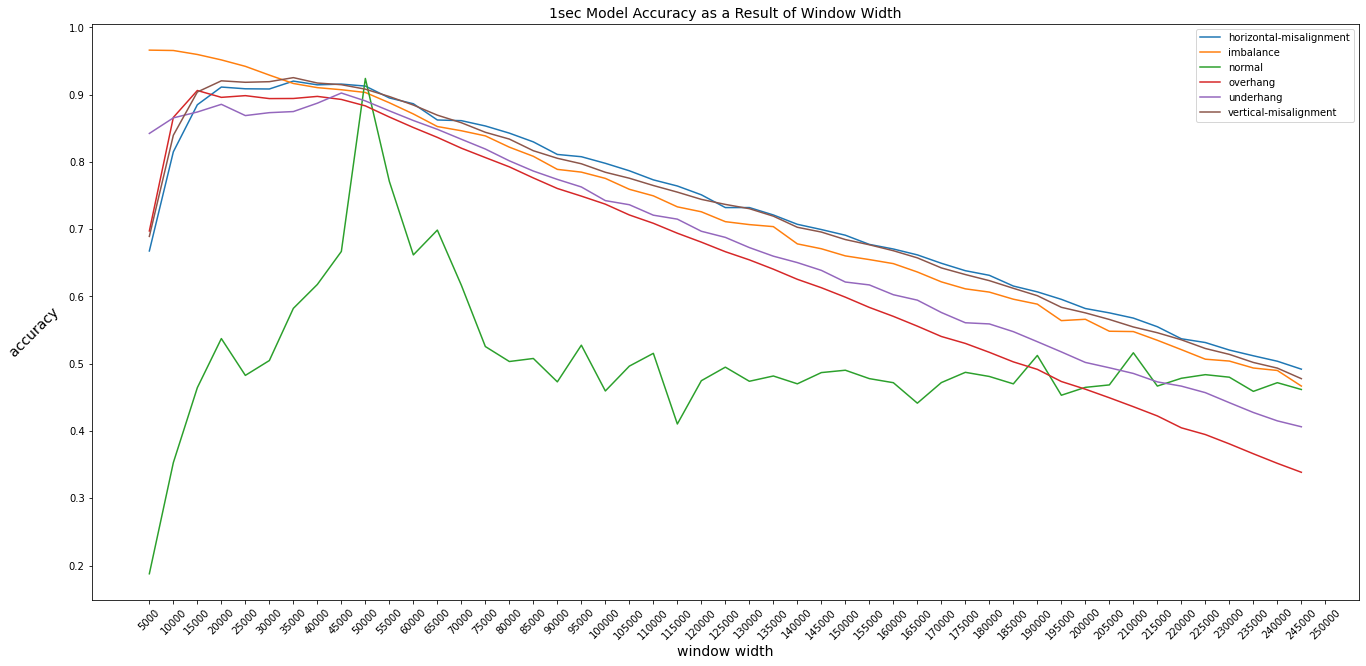

In [6]:
fig = plt.figure(figsize=(22,10))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
for c in classDict:
    vals = np.array([_[c] for _ in zone_accs])
    ax.plot([np.mean(_) for _ in vals.T],label=c)
plt.legend()
l=np.arange(5000,255000,5000)
ax.set_xticks(np.arange(len(l)))
ax.set_xticklabels(l,rotation=45)
plt.xlabel('window width',fontdict={'size':14})
plt.ylabel('accuracy                ',rotation=45,fontdict={'size':14})
plt.title(f"{path.split('/')[-2].split('_')[0]} Model Accuracy as a Result of Window Width",fontdict={'size':14});